# ER Machine Learning Analysis
This notebook performs both regression and classification on ER data, with SHAP interpretability.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [2]:
# 1. Load Dataset
file_path = r"C:\Users\ASUS\Downloads\Anacoda\er_data.csv"
df = pd.read_csv(file_path)
df.head()

,CaseID,Shift,TriageLevel,StaffOnDuty,WaitTime_Mins,Walkout_YN,ArrivalTime,Age,CriticalCases_OnShift
0,1,Day,2,5,160.12,No,Afternoon,45.3,2
1,2,Night,1,6,190.45,Yes,Morning,50.1,1
2,3,Day,3,5,130.78,No,Evening,39.7,0
3,4,Day,2,5,175.23,No,Afternoon,48.9,3
4,5,Night,2,4,210.67,Yes,Evening,55.2,2


In [3]:
# 2. Encode Categorical Variables
le = LabelEncoder()
df['Shift'] = le.fit_transform(df['Shift'])              # Day=0, Night=1
df['Walkout_YN'] = le.fit_transform(df['Walkout_YN'])    # No=0, Yes=1
df['ArrivalTime'] = le.fit_transform(df['ArrivalTime'])  # Morning=0, Afternoon=1, Evening=2
df.head()

,CaseID,Shift,TriageLevel,StaffOnDuty,WaitTime_Mins,Walkout_YN,ArrivalTime,Age,CriticalCases_OnShift
0,1,0,2,5,160.12,0,0,45.3,2
1,2,1,1,6,190.45,1,2,50.1,1
2,3,0,3,5,130.78,0,1,39.7,0
3,4,0,2,5,175.23,0,0,48.9,3
4,5,1,2,4,210.67,1,1,55.2,2


In [4]:
# 3. REGRESSION: Predict WaitTime_Mins
X_reg = df[['Shift', 'TriageLevel', 'ArrivalTime']]
y_reg = df['WaitTime_Mins']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)


--- Regression Results ---
R² Score: 0.8282401236200304
MSE: 94.10876454674302


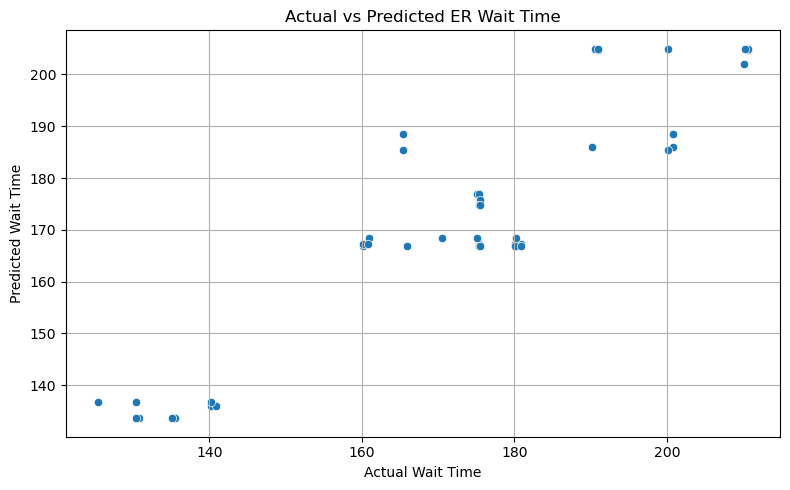

In [5]:
# Regression Evaluation
print("\n--- Regression Results ---")
print("R² Score:", r2_score(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))

# Plot: Actual vs Predicted Wait Time
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel("Actual Wait Time")
plt.ylabel("Predicted Wait Time")
plt.title("Actual vs Predicted ER Wait Time")
plt.grid(True)
plt.tight_layout()
plt.show()


SHAP Summary Plot for Regression (WaitTime_Mins):


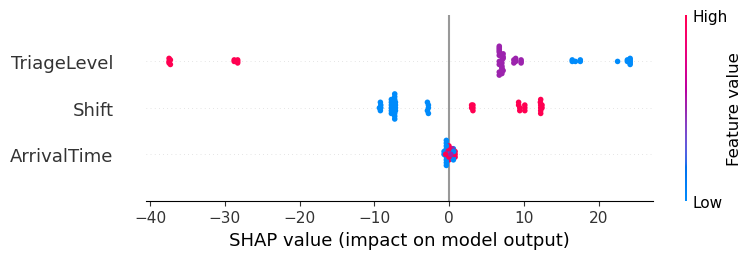

In [6]:
# SHAP Analysis for Regression
explainer_reg = shap.Explainer(reg_model, X_train_reg)
shap_values_reg = explainer_reg(X_test_reg)

print("\nSHAP Summary Plot for Regression (WaitTime_Mins):")
shap.summary_plot(shap_values_reg, X_test_reg)

In [7]:
# 4. CLASSIFICATION: Predict Walkout_YN
X_clf = df[['WaitTime_Mins', 'Shift', 'TriageLevel']]
y_clf = df['Walkout_YN']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)


--- Classification Results ---
Accuracy: 1.0000
Confusion Matrix:
 [[29  0]
 [ 0 21]]
Confusion Matrix Breakdown: TN=29, FP=0, FN=0, TP=21


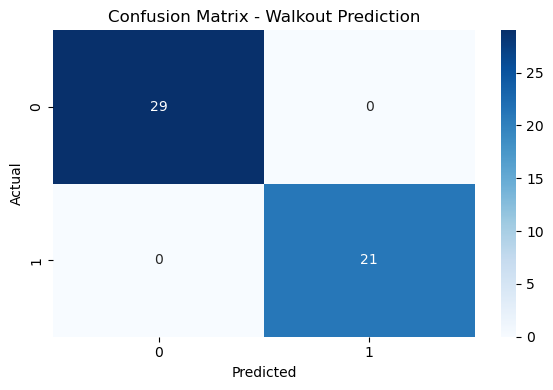

In [8]:
# Classification Evaluation
acc = accuracy_score(y_test_clf, y_pred_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)

print("\n--- Classification Results ---")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)
print(f"Confusion Matrix Breakdown: TN={cm[0][0]}, FP={cm[0][1]}, FN={cm[1][0]}, TP={cm[1][1]}")

# Plot: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Walkout Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


SHAP Summary Plot for Classification (Walkout_YN):


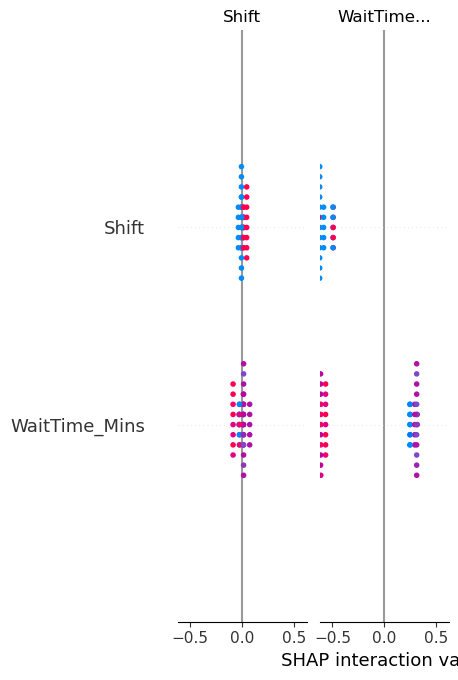

In [9]:
# SHAP Analysis for Classification
explainer_clf = shap.Explainer(clf_model, X_train_clf)
shap_values_clf = explainer_clf(X_test_clf)

print("\nSHAP Summary Plot for Classification (Walkout_YN):")
shap.summary_plot(shap_values_clf, X_test_clf)